## READ
This notebook looks at the same spinup time, but with different validation data, i.e., the one with higher depth resolution and a slightly higher temporal coverage. This data was taken in 2016.

In [112]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [114]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [115]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

This notebook looks at the performance of the thermal model over a long period of time, to see how long it takes to get rid of initial conditions for different soil layers.

In [116]:
# define layers with data
layers = [
    '0.0', '0.25', '0.5',
    '1.0', '1.25', '1.5', '1.75',
    '2.0', '2.25', '2.5', '2.75',
    '3.0', '3.25', '3.5', '3.75',
    '4.0', '4.25',
    ]  # [m] depths at which ground temperature is written seperately to csv file

First load in model results.

In [118]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid1 = 'val_gt17'
runid2 = 'val_gt23'

fname_gt1 = runid1 + "_ground_temperature_timeseries.csv"
fname_gt2 = runid2 + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt1 = pd.read_csv(fname_gt1, parse_dates=['time'])
df_gt2 = pd.read_csv(fname_gt2, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = [f'temp_{layer}m[K]' for layer in layers]

colnames_celcius = []

print(colnames)

for colname in colnames:
    
    colname_celcius = f'{colname[:-3]}[C]'
    
    colnames_celcius.append(colname_celcius)

    df_gt1[colname_celcius] = df_gt1[colname] - 273.15
    df_gt2[colname_celcius] = df_gt2[colname] - 273.15

df_gt1.head()

['temp_0.0m[K]', 'temp_0.25m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_1.25m[K]', 'temp_1.5m[K]', 'temp_1.75m[K]', 'temp_2.0m[K]', 'temp_2.25m[K]', 'temp_2.5m[K]', 'temp_2.75m[K]', 'temp_3.0m[K]', 'temp_3.25m[K]', 'temp_3.5m[K]', 'temp_3.75m[K]', 'temp_4.0m[K]', 'temp_4.25m[K]']


Unnamed: 0                time  air_temp[K]  temp_0.0m[K]  temp_0.25m[K]  \
0           0 2016-01-01 00:00:00   255.170934    267.968270     267.968270   
1           1 2016-01-01 01:00:00   255.170934    262.634628     267.949534   
2           2 2016-01-01 02:00:00   255.433563    260.091417     267.856772   
3           3 2016-01-01 03:00:00   255.715761    258.796361     267.684374   
4           4 2016-01-01 04:00:00   256.799234    258.549514     267.453376   

   temp_0.5m[K]  temp_0.75m[K]  temp_1.0m[K]  temp_1.25m[K]  temp_1.5m[K]  \
0    267.968767     267.998592    268.029697     267.650560    267.081855   
1    267.970911     267.998580    267.996519     267.650347    267.081855   
2    267.972492     267.998465    267.972443     267.649261    267.081855   
3    267.973524     267.998123    267.953658     267.647159    267.081854   
4    267.973690     267.997469    267.938131     267.644191    267.081849   

   ...  temp_2.0m[C]  temp_2.25m[C]  temp_2.5m[C]  temp_2.75m[C]  \
0  ...     -7.005919      -7.234024     -7.576181      -7.804286   
1  ...     -6.994451      -7.233950     -7.576181      -7.804196   
2  ...     -6.985999      -7.233574     -7.576177      -7.803726   
3  ...     -6.979322      -7.232844     -7.576154      -7.802797   
4  ...     -6.973749      -7.231806     -7.576094      -7.801457   

   temp_3.0m[C]  temp_3.25m[C]  temp_3.5m[C]  temp_3.75m[C]  temp_4.0m[C]  \
0     -8.066987      -8.066987     -8.066987      -8.066987     -8.066987   
1     -8.059688      -8.066944     -8.066987      -8.066987     -8.066987   
2     -8.052541      -8.066700     -8.066987      -8.066987     -8.066987   
3     -8.045782      -8.066175     -8.066986      -8.066987     -8.066987   
4     -8.039460      -8.065361     -8.066982      -8.066987     -8.066987   

   temp_4.25m[C]  
0      -8.066987  
1      -8.066987  
2      -8.066987  
3      -8.066987  
4      -8.066987  

[5 rows x 46 columns]

In [119]:
print(df_gt1.time)

0       2016-01-01 00:00:00
1       2016-01-01 01:00:00
2       2016-01-01 02:00:00
3       2016-01-01 03:00:00
4       2016-01-01 04:00:00
                ...        
87835   2016-12-31 19:00:00
87836   2016-12-31 20:00:00
87837   2016-12-31 21:00:00
87838   2016-12-31 22:00:00
87839   2016-12-31 23:00:00
Name: time, Length: 87840, dtype: datetime64[ns]


Load in data.

In [120]:
# load in Erikson data
df_erikson1 = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson2\Temp_arrays USGS-UCSC_Oberle\BI_T-1_processed.csv")), 
    parse_dates=['date_time'],
    )

df_erikson3 = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson2\Temp_arrays USGS-UCSC_Oberle\BI_T-3_processed.csv")), 
    parse_dates=['date_time'],
    )

df_erikson4 = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson2\Temp_arrays USGS-UCSC_Oberle\BI_T-4_processed.csv")), 
    parse_dates=['date_time'],
    )

# lets have a look
display(df_erikson1.head())
display(df_erikson1.tail())

date_time  dpth0cm  dpth25cm  dpth50cm  dpth100cm  dpth125cm  \
0 2016-05-31 18:28:21 -1.82300  -2.49850  -3.27075   -3.70675   -4.36265   
1 2016-05-31 19:28:21 -1.83305  -2.50855  -3.27075   -3.70925   -4.36770   
2 2016-05-31 20:28:21 -1.84810  -2.52115  -3.25570   -3.71930   -4.37020   
3 2016-05-31 21:28:21 -1.85310  -2.52615  -3.25825   -3.72940   -4.36520   
4 2016-05-31 22:28:21 -1.87070  -2.52870  -3.24820   -3.72435   -4.36770   

   dpth150cm  dpth175cm  dpth200cm  dpth225cm  dpth250cm  dpth275cm  \
0    -4.8558   -5.12305   -5.50035    -5.5635   -5.88745   -6.27345   
1    -4.8558   -5.12560   -5.50535    -5.5610   -5.90000   -6.26345   
2    -4.8558   -5.12055   -5.49280    -5.5560   -5.89495   -6.25090   
3    -4.8558   -5.11555   -5.49030    -5.5560   -5.88995   -6.25590   
4    -4.8558   -5.12055   -5.49785    -5.5535   -5.89495   -6.26095   

   dpth300cm  dpth325cm  dpth350cm  dpth375cm  dpth400cm  dpth425cm  
0    -7.4496   -8.20100   -8.53805   -8.51100   -8.21095   -8.03485  
1    -7.4446   -8.20855   -8.53805   -8.50845   -8.21095   -8.02230  
2    -7.4421   -8.20350   -8.53555   -8.51350   -8.21095   -8.02980  
3    -7.4421   -8.21105   -8.53805   -8.51850   -8.20595   -8.02230  
4    -7.4421   -8.20100   -8.53555   -8.51600   -8.20845   -8.03485

date_time  dpth0cm  dpth25cm  dpth50cm  dpth100cm  dpth125cm  \
2169 2016-09-13 23:28:20   0.1155  -0.15535  -0.64515   -1.00155    -1.4647   
2170 2016-09-14 21:28:26   0.0000  -0.21315  -0.64515   -0.99400    -1.4647   
2171 2016-09-14 21:28:57   0.0000  -0.16540  -0.64515   -0.99905    -1.4647   
2172 2016-09-14 22:28:20  -0.0025  -0.16040  -0.64515   -0.99400    -1.4647   
2173 2016-09-14 23:28:20  -0.0025  -0.16040  -0.64515   -0.99400    -1.4647   

      dpth150cm  dpth175cm  dpth200cm  dpth225cm  dpth250cm  dpth275cm  \
2169    -1.8023   -2.02965   -2.32815   -2.35305   -2.63635   -2.95805   
2170    -1.7898   -2.03220   -2.34575   -2.35305   -2.63635   -2.96805   
2171    -1.7973   -2.03220   -2.31815   -2.35055   -2.62130   -2.93545   
2172    -1.7948   -2.02965   -2.33070   -2.35305   -2.63635   -2.93295   
2173    -1.7948   -2.03220   -2.31815   -2.34555   -2.63130   -2.92795   

      dpth300cm  dpth325cm  dpth350cm  dpth375cm  dpth400cm  dpth425cm  
2169   -4.08390   -5.13775   -5.97495   -6.70170   -7.32850   -7.80645  
2170   -4.06135   -5.13025   -5.97245   -6.73440   -7.33100   -7.79890  
2171   -4.06385   -5.13025   -5.97245   -6.68665   -7.30335   -7.79890  
2172   -4.06385   -5.13275   -5.97245   -6.67910   -7.31595   -7.79890  
2173   -4.06135   -5.13025   -5.97245   -6.69165   -7.30590   -7.79890

In [121]:
# Remove weird data spike
df_erikson3 = df_erikson3[df_erikson3.date_time < pd.to_datetime("2016-08-03")]

# and order in ascending date
mask = np.argsort(df_erikson3.date_time)

df_erikson3 = df_erikson3.iloc[mask]

Choose study site.

In [122]:
erikson_columns = df_erikson1.columns[1:]

print(erikson_columns)

Index(['dpth0cm', 'dpth25cm', 'dpth50cm', 'dpth100cm', 'dpth125cm',
       'dpth150cm', 'dpth175cm', 'dpth200cm', 'dpth225cm', 'dpth250cm',
       'dpth275cm', 'dpth300cm', 'dpth325cm', 'dpth350cm', 'dpth375cm',
       'dpth400cm', 'dpth425cm'],
      dtype='object')


Let's plot all model results in one large plot.

Text(0.5, 1.0, 'Temperature measured at BI_T-1 by Erikson et al')

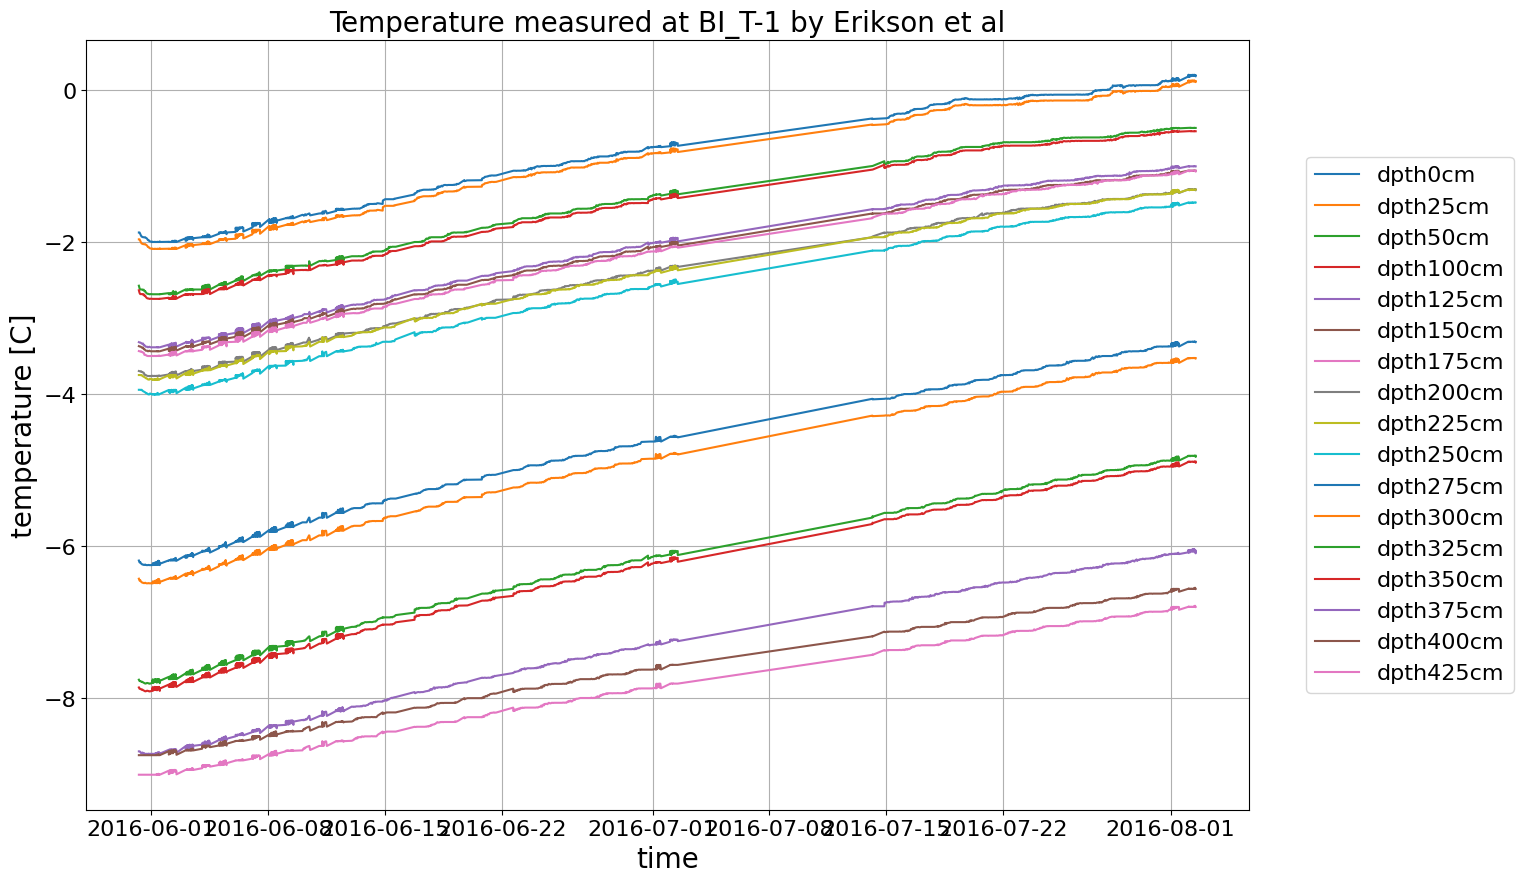

In [123]:
fig, ax = plt.subplots(figsize=(15, 10))

for i, colname in enumerate(erikson_columns):
    
    ax.plot(df_erikson3.date_time, df_erikson3[erikson_columns[i]], label=erikson_columns[i])
    
ax.set_xlabel('time')
ax.set_ylabel('temperature [C]')

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.set_title('Temperature measured at BI_T-1 by Erikson et al')

And now each erikson layer with corresponding modelling layer.

In [124]:
model_layers = []

for colname in df_gt1.columns:
    
    if '[C]' in str(colname) and colname in colnames_celcius:
        
        model_layers.append(colname)
        
print(model_layers)

['temp_0.0m[C]', 'temp_0.25m[C]', 'temp_0.5m[C]', 'temp_1.0m[C]', 'temp_1.25m[C]', 'temp_1.5m[C]', 'temp_1.75m[C]', 'temp_2.0m[C]', 'temp_2.25m[C]', 'temp_2.5m[C]', 'temp_2.75m[C]', 'temp_3.0m[C]', 'temp_3.25m[C]', 'temp_3.5m[C]', 'temp_3.75m[C]', 'temp_4.0m[C]', 'temp_4.25m[C]']


Let's define a function that converts datetime to hour of year, and adds a number corresponding to the number of the iteration.

In [125]:
def time_to_index(date_array, iteration=0):
    
    # print(pd.to_datetime(df_erikson.time).dt.dayofyear.shape)
    # print(pd.to_datetime(df_erikson.time).dt.hour.shape)
    
    return (pd.to_datetime(date_array).dayofyear * 24 + pd.to_datetime(date_array).hour).values + iteration * 8760
    
(time_to_index(df_erikson1.date_time.values, 9)).shape
(time_to_index(df_erikson1.date_time.values, 10)).shape

(2174,)

In [126]:
print(len(erikson_columns))
print(len(model_layers))
print(erikson_columns)

17
17
Index(['dpth0cm', 'dpth25cm', 'dpth50cm', 'dpth100cm', 'dpth125cm',
       'dpth150cm', 'dpth175cm', 'dpth200cm', 'dpth225cm', 'dpth250cm',
       'dpth275cm', 'dpth300cm', 'dpth325cm', 'dpth350cm', 'dpth375cm',
       'dpth400cm', 'dpth425cm'],
      dtype='object')


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_5500\2583826508.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


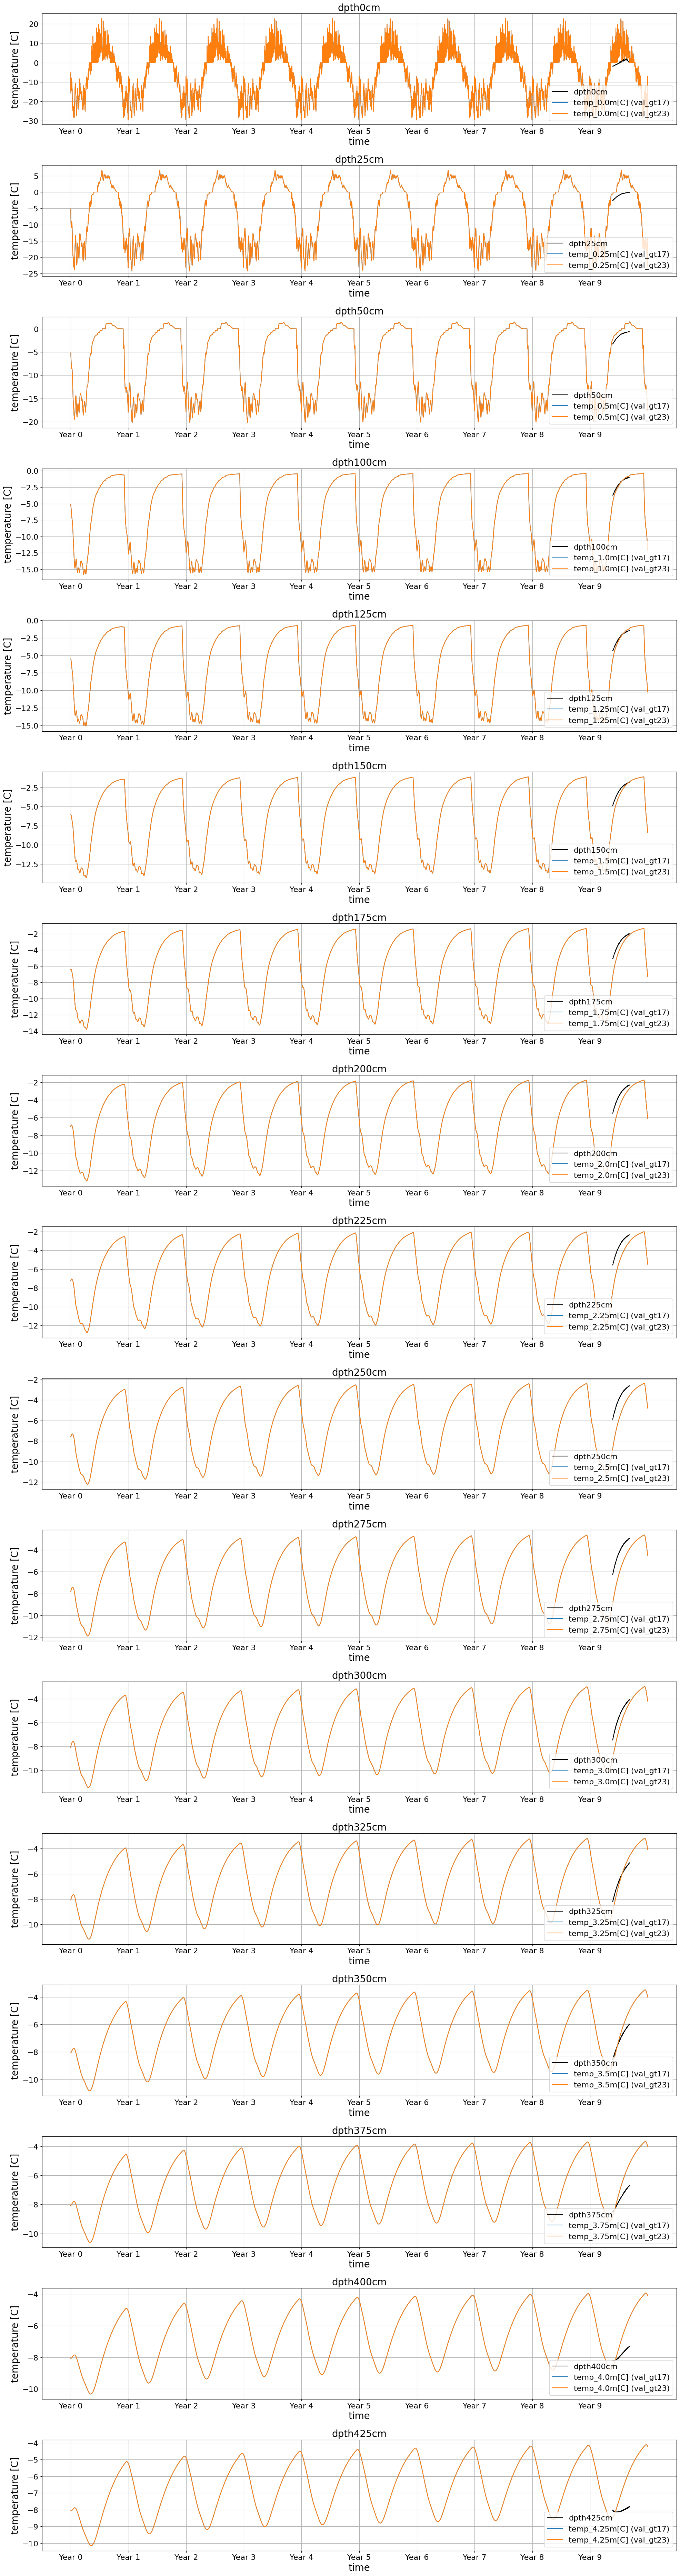

In [127]:
# load some date values for axis, like every 
numbers = np.array(df_gt1.index[::8784])
labels = np.array([f'Year {i}' for i in range(10)])


fig, ax = plt.subplots(len(erikson_columns), figsize=(20, 75))

for i, erikson_colname, model_colname in zip(np.arange(len(erikson_columns)), erikson_columns, model_layers):
    
    ax[i].plot(time_to_index(df_erikson1.date_time.values, 9), df_erikson1[erikson_colname], label=erikson_colname, color='k')
    
    ax[i].plot(df_gt1.index, df_gt1[model_colname], label=f'{model_colname} ({runid1})', color='C0') 
    ax[i].plot(df_gt2.index, df_gt2[model_colname], label=f'{model_colname} ({runid2})', color='C1')
    
    ax[i].grid()
    ax[i].legend(loc='lower right')
    ax[i].set_xlabel('time')
    ax[i].set_ylabel('temperature [C]')
    ax[i].set_title(f'{erikson_colname}')
    
    ax[i].set_xticks(numbers, labels)
    
    # ax[i].set_xlim((80000, 88000))
    
fig.tight_layout()

fig.show()

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_5500\2816670700.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


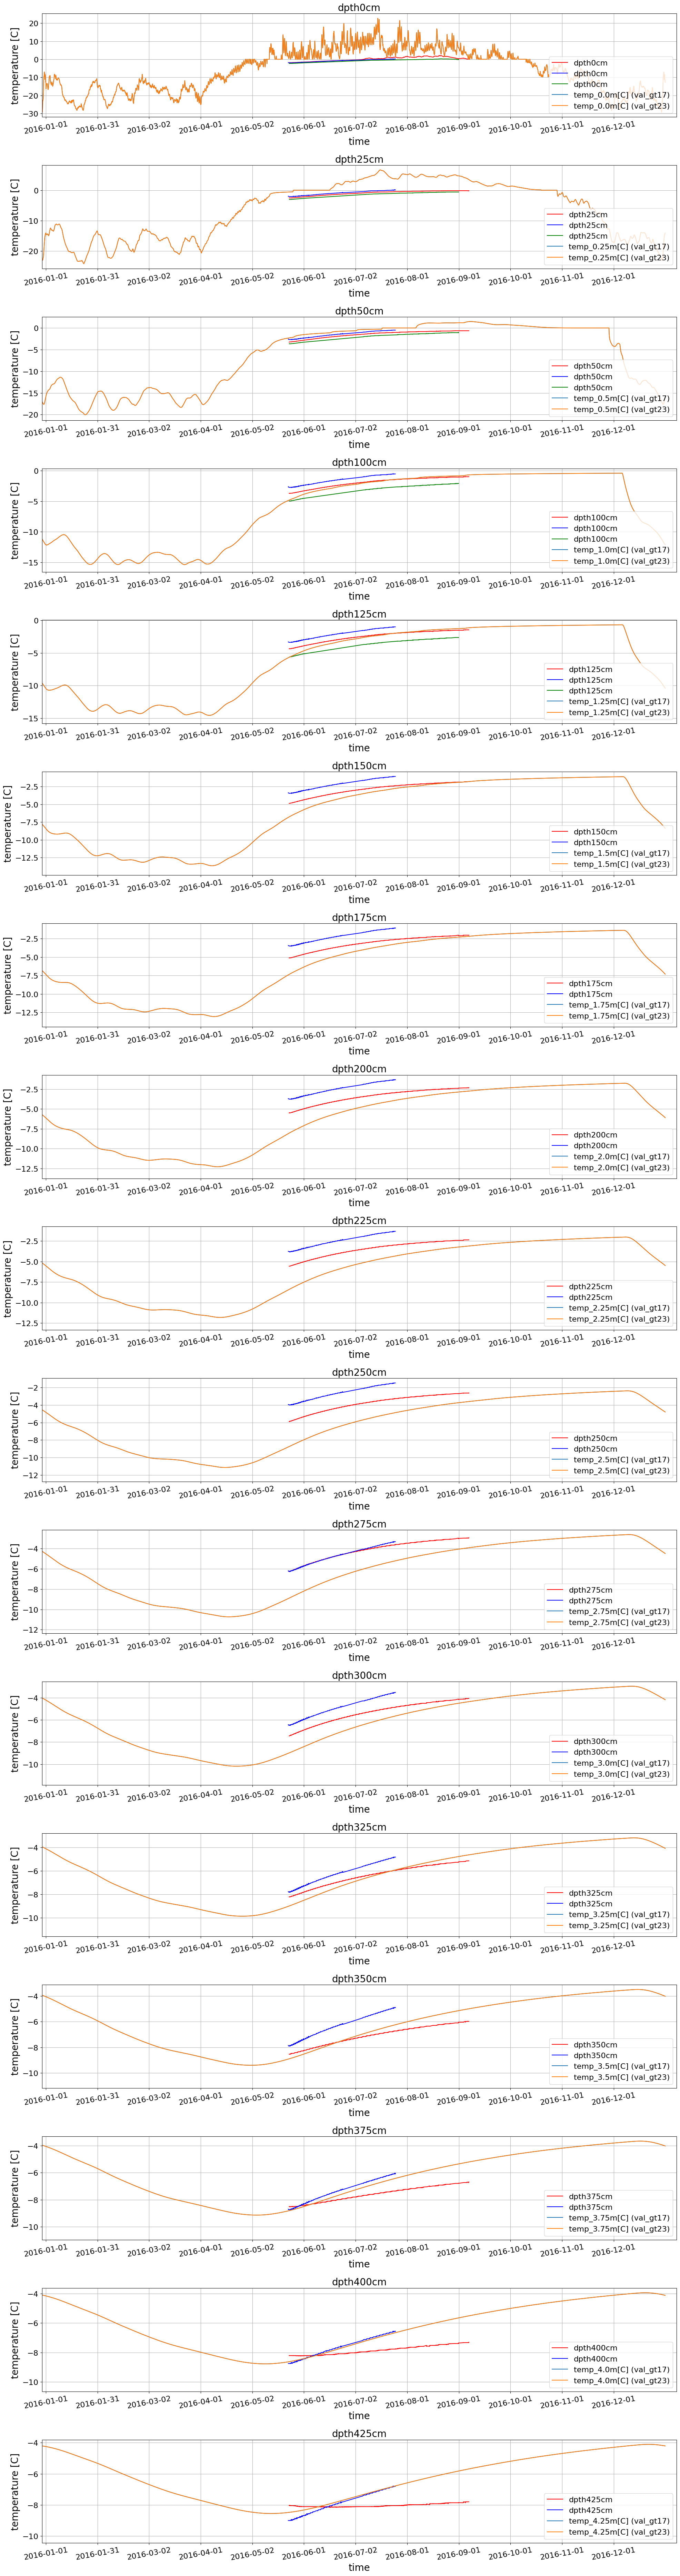

In [128]:
# load some date values for axis, like every 
i_last_year = int(len(df_gt1) * 9/10)
numbers = np.array(df_gt1[i_last_year:].index[::int(len(df_gt1) / 10 / 12)])
labels = np.array([str(df_gt1.time.values[i])[:-19] for i in numbers], dtype=str)

fig, ax = plt.subplots(len(erikson_columns), figsize=(20, 75))

for i, erikson_colname, model_colname in zip(np.arange(len(erikson_columns)), erikson_columns, model_layers):
    
    if erikson_colname in df_erikson1.columns:
    
        ax[i].plot(time_to_index(df_erikson1.date_time.values, 9), df_erikson1[erikson_colname], label=erikson_colname, color='r')
        
    if erikson_colname in df_erikson3.columns:
        
        ax[i].plot(time_to_index(df_erikson3.date_time.values, 9), df_erikson3[erikson_colname], label=erikson_colname, color='b')
        
    if erikson_colname in df_erikson4.columns:
        
        ax[i].plot(time_to_index(df_erikson4.date_time.values, 9), df_erikson4[erikson_colname], label=erikson_colname, color='g')
        
    # if erikson_colname in df_erikson1.columns and erikson_colname in df_erikson3.columns:
        
    #     t_min = df_erikson1.date_time.values[0]
    #     t_max = df_erikson3.date_time.values[-1]
        
    #     print(t_min, t_max)
        
    #     mask1 = (df_erikson1.date_time > t_min) & (df_erikson1.date_time < t_max)
    #     mask3 = (df_erikson3.date_time > t_min) & (df_erikson3.date_time < t_max)
        
    #     x = df_erikson3[mask3].date_time
        
    #     y1 = df_erikson1[mask1][erikson_colname].values
    #     y2 = df_erikson3[mask3][erikson_colname].values
        
    #     print(len(x), len(y1), len(y2))

    #     ax[i].fill_between(df_erikson3[mask3].date_time, df_erikson1[mask1][erikson_colname], df_erikson3[mask3][erikson_colname])
    
    
    
    
    ax[i].plot(df_gt1.index, df_gt1[model_colname], label=f'{model_colname} ({runid1})', color='C0') 
    ax[i].plot(df_gt2.index, df_gt2[model_colname], label=f'{model_colname} ({runid2})', color='C1')
    
    # ax[i].plot(df_gt2.index, df_gt2[model_colname], label=f'Modelled', color='C1')
    # ax[i].plot(time_to_index(df_erikson.date_time.values, 9), df_erikson[erikson_colname], label='Measured', color='k')
    
    ax[i].grid()
    ax[i].legend(loc='lower right')
    ax[i].set_xlabel('time')
    ax[i].set_ylabel('temperature [C]')
    ax[i].set_title(f'{erikson_colname}')
    
    ax[i].set_xticks(numbers)
    ax[i].set_xticklabels(labels, rotation=10)
    
    ax[i].set_xlim((79000, 88000))
    
fig.tight_layout()

fig.show()

In [129]:
# fig, ax = plt.subplots(figsize=(15, 8))

# ax.plot(df_gt1.index, df_gt1['temp_0.5m[C]'].values, color='C0', label=f'ERA5 IC (0.5m)')
# ax.plot(df_gt1.index, df_gt1['temp_1.0m[C]'].values, color='C1', label=f'ERA5 IC (1.0m)')
# ax.plot(df_gt1.index, df_gt1['temp_2.0m[C]'].values, color='C2', label=f'ERA5 IC (2.0m)')
# ax.plot(df_gt1.index, df_gt1['temp_2.95m[C]'].values, color='C3', label=f'ERA5 IC (2.95m)')

# ax.plot(df_gt2.index, df_gt2['temp_0.5m[C]'].values, '--', color='C0', label=f'ERA5 (MLR) IC (0.5m)')
# ax.plot(df_gt2.index, df_gt2['temp_1.0m[C]'].values, '--', color='C1', label=f'ERA5 (MLR) IC (1.0m)')
# ax.plot(df_gt2.index, df_gt2['temp_2.0m[C]'].values, '--', color='C2', label=f'ERA5 (MLR) IC (2.0m)')
# ax.plot(df_gt2.index, df_gt2['temp_2.95m[C]'].values, '--', color='C3', label=f'ERA5 (MLR) IC (2.95m)')

# ax.grid()
# ax.legend()

# ax.set_title("Modelled temperature over time (2011 ten times repeated)")
# ax.set_ylabel('temperature [C]')
# ax.set_xlabel('timestep')

# # ax.set_ylim((-10, 0))

# fig.show()

# fig.savefig(os.path.join(save_path, 'spin_up.png'), bbox_inches='tight', facecolor='white', transparent=False)

And now each one individually, each year layered over eachother

In [59]:
# df_gt = [df_gt1, df_gt2][0]

In [60]:
# N = len(df_gt1)
# years = np.arange(10)

# N_year = int(N / len(years))

# model_temp_050 = df_gt['temp_0.5m[C]'].values.reshape((len(years), N_year))
# model_temp_100 = df_gt['temp_1.0m[C]'].values.reshape((len(years), N_year))
# model_temp_200 = df_gt['temp_2.0m[C]'].values.reshape((len(years), N_year))
# model_temp_295 = df_gt['temp_2.95m[C]'].values.reshape((len(years), N_year))

# print(model_temp_050.shape)

In [61]:
# fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# # loop through different depths
# for i, model_temp in enumerate([model_temp_050, model_temp_100, model_temp_200, model_temp_295]):
    
#     # loop through different years
#     for it, row in enumerate(model_temp):
        
#         axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}')
#         # axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}', alpha=0.5)

#     # also plot measured data
#     col = erikson_columns[i]
#     axs[i].plot(time_to_index(df_erikson.time), df_erikson[col], "k--", label=f"measured {col}")
    
#     # and give the plot some attributes
#     axs[i].grid()
#     axs[i].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
#     axs[i].set_xlabel('Hour of year (2011) [-]')
#     axs[i].set_ylabel('Temperature [C]')
#     axs[i].set_title(f'Temperature at {[0.5, 1.0, 2.0, 2.95][i]:.2f}m depth')
    
        
# fig.tight_layout()
# fig.show()

In [62]:
# fig, ax = plt.subplots(figsize=(15, 5))

# ax.plot(df_gt.index, df_gt['temp_0m[C]'], label="model (0.0m)")

# ax.grid()
# ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.set_xlabel('timestep [0]')
# ax.set_ylabel('Temperature [C]')
# ax.set_title("Surface temperature over time (2011 ten times repeated)")

